In [1]:
import numpy as np
import time
import glob
import cv2
import sdc.image_processing.feature_extraction_settings as fes
import sdc.image_processing.feature_extraction as fe
import sdc.detection.svm_classifier as sc
import sdc.detection.object_detection as od
from sdc.image_processing.helpers import visualize
import sdc.detection.window as w
import matplotlib.pylab as plt

%matplotlib inline

#### Getting ready data and settings for classifier

In [2]:
# Create vector of image file names
vehicles = np.array(glob.glob('training_data/vehicles/*/*'))
non_vehicles = np.array(glob.glob('training_data/non-vehicles/*/*'))

# Create response vector
y_vehicles = np.ones(vehicles.shape)
y_non_vehicles = np.zeros(non_vehicles.shape)

# Concatenate vehicles and non vehicles 
X_data = np.concatenate((vehicles, non_vehicles))
Y_data = np.concatenate((y_vehicles, y_non_vehicles))

# Various parameters for generating feature vectors like colour spaces, orientation, sizes, etc..
settings = fes.FeatureExtractionSettings()

In [3]:
print(
    'Vehicles: {}\nNon Vehicles: {}\nTotal: {}'.format(
        len(y_vehicles), 
        len(y_non_vehicles), 
        len(Y_data))
)

Vehicles: 8792
Non Vehicles: 8968
Total: 17760


Before training the dataset will be split into training and testing dataset. 20% of the data will be used for validating the model. This is defined in **sdc.detection.svm_classifier** line 27

#### Train classifier

In [4]:
t = time.time()
classifier = sc.SVMClassifier(settings)
score = classifier.train(X_data, Y_data)
total = time.time() - t
print('Accuracy: {}\nTook time to train: {} seconds'.format(score, round(total)))

Accuracy: 0.9915540540540541
Took time to train: 73 seconds


### Checking detection, using sliding window technique

Let's test our classifier on one of the provided images

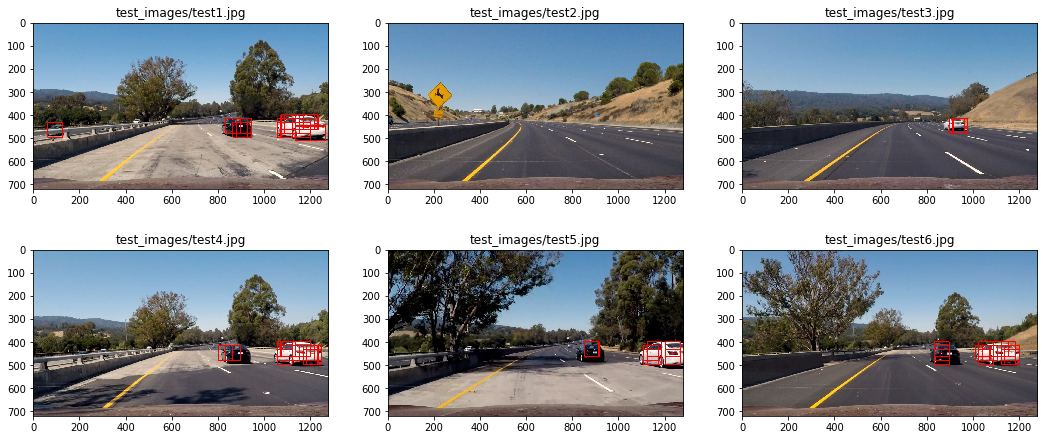

In [13]:
example_images = [
    'test_images/test1.jpg', 
    'test_images/test2.jpg',
    'test_images/test3.jpg',
    'test_images/test4.jpg',
    'test_images/test5.jpg',
    'test_images/test6.jpg'
    ]

obj_det = od.ObjectDetection(classifier)
images = []
for img_fn in example_images:
    img = cv2.imread(img_fn)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    draw_img, _ = obj_det.find_objects(img)
    images.append(draw_img)
    
fig = plt.figure(figsize=(18, 16))
visualize(fig, 4, 3, images, example_images)    


Looks good enough. Vehicles identified correctly. test1.jpg looks like has 1 false positive but looking more carefully actually it is a vehicle.

In [6]:
# Save our model
classifier.save()